In [1]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, f1_score, precision_score, recall_score, roc_curve

# Loading of data file

In [2]:
feat_file=pd.read_csv('cancer_mordred_preprocessed.csv')

In [3]:
feat_file.head()

,ABC,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VE2_A,VR1_A,VR3_A,...,JGI9,JGI10,JGT10,Diameter,TopoShapeIndex,SRW03,SRW05,TSRW10,WPath,mZagreb1
0,0.121378,0.0,0.0,0.165387,0.722883,0.785705,0.625380,0.172377,0.000007,0.325947,...,0.000000,0.000000,0.570573,8.000000e-08,0.60,0.0,0.000000,0.255696,1.210999e-09,0.142857
1,0.187982,0.2,0.2,0.183974,0.723677,0.830321,0.605608,0.205313,0.001804,0.317939,...,0.460767,0.614607,0.593865,1.000000e+00,0.00,0.0,0.555084,0.412322,1.242729e-02,0.133016
2,0.161982,0.0,0.0,0.232151,0.766968,0.882304,0.685177,0.152569,0.000011,0.359675,...,0.000000,0.000000,0.431425,8.000000e-08,1.00,0.0,0.000000,0.335127,1.919619e-09,0.125236
3,0.150052,0.1,0.0,0.183974,0.723677,0.830321,0.605608,0.205313,0.001804,0.317939,...,0.000000,0.000000,0.502729,1.000000e+00,0.00,0.0,0.437189,0.361216,1.586462e-02,0.153556
4,0.073037,0.0,0.0,0.115319,0.672574,0.876552,0.525463,0.248485,0.000004,0.264019,...,0.000000,0.000000,0.267857,7.000000e-08,0.75,0.0,0.000000,0.204382,3.516658e-10,0.053493


In [4]:
feat_file.shape

(2129, 820)

In [5]:
X=feat_file.values

In [6]:
label= pd.read_csv('cancer_label.csv')
label.head()

,Status
0,0
1,0
2,0
3,1
4,0


In [7]:
y=label.values.ravel()

# split


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [9]:
X_train.shape

(1703, 820)

# boruta

In [10]:
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)


In [11]:
from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X_train, y_train)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_train_filtered = feat_selector.transform(X_train)
X_test_filtered = feat_selector.transform(X_test)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	820
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	820
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	820
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	820
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	820
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	820
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	820
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	88
Tentative: 	201
Rejected: 	531
Iteration: 	9 / 100
Confirmed: 	88
Tentative: 	201
Rejected: 	531
Iteration: 	10 / 100
Confirmed: 	88
Tentative: 	201
Rejected: 	531
Iteration: 	11 / 100
Confirmed: 	88
Tentative: 	201
Rejected: 	531
Iteration: 	12 / 100
Confirmed: 	96
Tentative: 	149
Rejected: 	575
Iteration: 	13 / 100
Confirmed: 	96
Tentative: 	149
Rejected: 	575
Iteration: 	14 / 100
Confirmed: 	96
Tentative: 	149
Rejected: 	575
Iteration: 	15 / 100
Confirmed: 	96
Tentative: 	149
Rejected: 	575
Iteration: 	16 / 100
Conf

In [12]:
X_train_filtered.shape

(1703, 129)

In [13]:
y_train.shape

(1703,)

In [14]:
selected_feat_indices = np.where(feat_selector.support_ == True)[0]

In [15]:
selected_feat_indices

array([  2,   3,   6,   8,  14,  28,  30,  32,  33,  34,  35,  44,  47,
        61,  72,  73,  87,  88,  89,  90,  97,  99, 100, 106, 107, 117,
       131, 132, 139, 140, 147, 148, 155, 156, 157, 158, 161, 165, 166,
       168, 171, 172, 175, 176, 177, 185, 194, 211, 212, 221, 228, 229,
       232, 238, 247, 250, 257, 264, 300, 303, 305, 313, 331, 334, 343,
       351, 355, 358, 367, 370, 375, 379, 382, 383, 384, 399, 400, 401,
       403, 404, 405, 406, 407, 409, 410, 411, 415, 416, 417, 418, 429,
       457, 459, 461, 462, 464, 467, 469, 471, 474, 481, 529, 558, 565,
       567, 598, 601, 605, 611, 612, 615, 626, 634, 654, 655, 656, 658,
       659, 662, 666, 683, 684, 704, 705, 707, 726, 732, 795, 797])

In [16]:
selected_feat_names = list(feat_file.columns[selected_feat_indices])

In [17]:
selected_feat_names

['nBase',
 'SpAbs_A',
 'LogEE_A',
 'VR1_A',
 'nH',
 'ATS0s',
 'ATS2s',
 'ATS0Z',
 'ATS1Z',
 'ATS3Z',
 'ATS0p',
 'AATS8dv',
 'AATS3d',
 'AATS8s',
 'AATS1v',
 'AATS3v',
 'AATS8se',
 'AATS0p',
 'AATS1p',
 'AATS2p',
 'AATS0i',
 'AATS2i',
 'AATS3i',
 'ATSC0c',
 'ATSC1c',
 'ATSC3dv',
 'ATSC1s',
 'ATSC2s',
 'ATSC1Z',
 'ATSC2Z',
 'ATSC0v',
 'ATSC1v',
 'ATSC8v',
 'ATSC0se',
 'ATSC1se',
 'ATSC2se',
 'ATSC5se',
 'ATSC0pe',
 'ATSC1pe',
 'ATSC5pe',
 'ATSC1p',
 'ATSC2p',
 'ATSC0i',
 'ATSC1i',
 'ATSC2i',
 'AATSC1c',
 'AATSC1dv',
 'AATSC1s',
 'AATSC2s',
 'AATSC2Z',
 'AATSC0v',
 'AATSC1v',
 'AATSC4v',
 'AATSC1se',
 'AATSC1pe',
 'AATSC1p',
 'AATSC0i',
 'AATSC7i',
 'MATS1v',
 'MATS4v',
 'MATS1se',
 'MATS1p',
 'GATS5c',
 'GATS8c',
 'GATS1d',
 'GATS1s',
 'GATS5s',
 'GATS8s',
 'GATS1v',
 'GATS4v',
 'GATS1se',
 'GATS5se',
 'GATS8se',
 'GATS1p',
 'GATS2p',
 'BCUTc-1h',
 'BCUTc-1l',
 'BCUTdv-1h',
 'BCUTd-1h',
 'BCUTd-1l',
 'BCUTs-1h',
 'BCUTs-1l',
 'BCUTZ-1h',
 'BCUTv-1h',
 'BCUTv-1l',
 'BCUTse-1h',
 'BCUTp-1h

In [18]:
train_x = pd.DataFrame(X_train)
test_x = pd.DataFrame(X_test)

In [19]:
train_x.columns=feat_file.columns
test_x.columns=feat_file.columns

In [20]:
new_df=train_x.loc[:,selected_feat_names]
X_train_filtered=new_df

new_df_test=test_x.loc[:,selected_feat_names]
X_test_filtered=new_df_test

# Boruta+ActiveSVM

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

In [22]:
import numpy as np
import time
import random
import os

from sklearn.preprocessing import normalize 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib import gridspec

from activeSVC import min_complexity, min_acquisition,min_complexity_cv, min_acquisition_cv,min_complexity_h5py, min_acquisition_h5py
import pandas as pd
import pickle
import os, psutil

In [23]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils import class_weight
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split
import pickle
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Input
from keras.models import Sequential, Model
from keras import optimizers, regularizers, initializers
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend as K
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

2023-04-24 12:19:29.846035: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 12:19:32.244115: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [24]:
def text_create(path, name, msg):
    full_path = path + "/" + name + '.pickle'
    f=open(full_path,'wb') 
    pickle.dump(msg,f)
    f.close()

class TimerError(Exception):
     """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Total run time: {elapsed_time:0.4f} seconds")
        return elapsed_time

In [25]:
print(np.shape(X_train_filtered))
print(np.shape(y_train))
print(np.shape(X_test_filtered))
print(np.shape(y_test))

(1703, 129)
(1703,)
(426, 129)
(426,)


In [26]:
'''
Parameters
'''
num_features = 20
num_samples=100
init_samples=200

if __name__ == '__main__':

    t=Timer()
    t.start()
    feature_selected, num_samples_list, samples_global, train_errors,test_errors,train_scores,test_scores,step_times= min_acquisition(
       X_train_filtered.values,y_train,X_test_filtered.values,y_test,num_features=num_features,num_samples=num_samples, init_samples=init_samples)
    elapsed_time=t.stop()

Elapsed time: 0.6984 seconds
feature 0 : gene [103]  200 samples
training error=0.46917204932472106 test error=0.45774647887323944
training accuracy=0.5308279506752789 test accuracy=0.5422535211267606
Elapsed time: 0.8450 seconds
feature 1 : gene 104  200 samples
training error=0.43335290663534937 test error=0.45774647887323944
training accuracy=0.5666470933646506 test accuracy=0.5422535211267606
Elapsed time: 0.6520 seconds
feature 2 : gene 122  205 samples
training error=0.3934233705226072 test error=0.4131455399061033
training accuracy=0.6065766294773929 test accuracy=0.5868544600938967
Elapsed time: 0.7167 seconds
feature 3 : gene 34  242 samples
training error=0.39048737522019966 test error=0.3826291079812207
training accuracy=0.6095126247798004 test accuracy=0.6173708920187794
Elapsed time: 0.5894 seconds
feature 4 : gene 61  242 samples
training error=0.4028185554903112 test error=0.392018779342723
training accuracy=0.5971814445096888 test accuracy=0.607981220657277
Elapsed time

In [27]:
feature_selected

[103,
 104,
 122,
 34,
 61,
 11,
 43,
 69,
 66,
 28,
 62,
 127,
 117,
 125,
 7,
 33,
 32,
 110,
 15,
 107]

In [35]:
selected_feat_names = list(X_train_filtered.columns[feature_selected])

In [36]:
selected_feat_names

['MAXdsN',
 'MAXsssN',
 'VSA_EState4',
 'ATSC1se',
 'MATS1p',
 'AATS8dv',
 'ATSC1i',
 'GATS4v',
 'GATS5s',
 'ATSC1Z',
 'GATS5c',
 'nRot',
 'Kier3',
 'MDEN-23',
 'ATS0Z',
 'ATSC0se',
 'ATSC8v',
 'ETA_eta_F',
 'AATS3v',
 'ETA_beta']

In [37]:
new_df = X_train_filtered.loc[:,selected_feat_names]

In [39]:
new_test=X_test_filtered.loc[:,selected_feat_names]

In [40]:
new_df.to_csv('sequential_train_mordred.csv',index=False)
new_test.to_csv('sequential_test_mordred.csv',index=False)

In [44]:
X_train_filtered=new_df
X_test_filtered=new_test

In [43]:
X_train_filtered.shape

(1703, 20)

In [46]:
X_test_filtered.shape

(426, 20)

In [47]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

In [48]:
km = KMeans(n_clusters=2, random_state=42)
#Fit the KMeans model
km.fit_predict(X_train_filtered)
y_pred = km.labels_

In [49]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_train_filtered,y_train, metric='euclidean')
ari = adjusted_rand_score(y_train, y_pred)
nmi = normalized_mutual_info_score(y_train, y_pred)

In [50]:
data = pd.DataFrame({'Clustering_scores': ['silhouette_score', 'adjusted_rand_score', 'normalized_mutual_info_score'],
        'Scores':[score,ari,nmi]})

In [51]:
data

,Clustering_scores,Scores
0,silhouette_score,0.010460
1,adjusted_rand_score,0.005131
2,normalized_mutual_info_score,0.005656


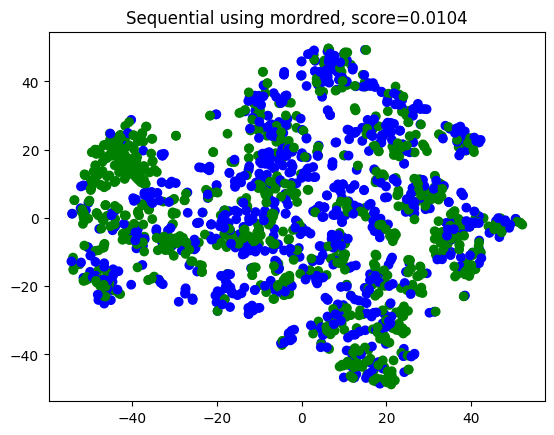

In [52]:
# Use t-SNE to reduce dimensionality of data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_train_filtered)
colors = ['blue', 'green']  # red for cluster 0, grey for cluster 1
cmap = ListedColormap(colors)

#plt.legend()

# Plot t-SNE reduced data points colored by cluster label
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,cmap=cmap)
plt.title('Sequential using mordred, score=0.0104')
plt.show()

## RFC

In [53]:
#define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train_filtered,y_train)
end=datetime.datetime.now()

y_pred_train=forest.predict(X_train_filtered)
y_pred_test=forest.predict(X_test_filtered)
y_prediction_values_train=forest.predict_proba(X_train_filtered)
y_prediction_values_test=forest.predict_proba(X_test_filtered)

In [54]:
rfc_acc_train=accuracy_score(y_train,y_pred_train)*100
rfc_acc_test=accuracy_score(y_test,y_pred_test)*100
rfc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
rfc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
rfc_f1_train=f1_score(y_train, y_pred_train, average='macro')
rfc_f1_test=f1_score(y_test, y_pred_test, average='macro')
rfc_prec_train=precision_score(y_train, y_pred_train)
rfc_prec_test=precision_score(y_test, y_pred_test)
rfc_recall_train=recall_score(y_train, y_pred_train)
rfc_recall_test=recall_score(y_test, y_pred_test)
kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa_train=kappa_train
kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa_test=kappa_test

rfc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
rfc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[136  63]
 [ 89 138]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6044    0.6834    0.6415       199
           1     0.6866    0.6079    0.6449       227

    accuracy                         0.6432       426
   macro avg     0.6455    0.6457    0.6432       426
weighted avg     0.6482    0.6432    0.6433       426



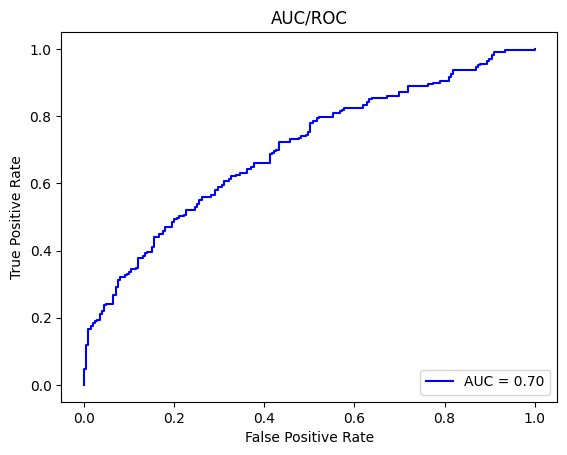

In [55]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_1=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train_filtered,y_train)
y_pred_test=KNN.predict(X_test_filtered)
y_pred_train=KNN.predict(X_train_filtered)


y_prediction_values_train=KNN.predict_proba(X_train_filtered)
y_prediction_values_test=KNN.predict_proba(X_test_filtered)


In [57]:
knn_acc_train=accuracy_score(y_train,y_pred_train)*100
knn_acc_test=accuracy_score(y_test,y_pred_test)*100
knn_mcc_train=matthews_corrcoef(y_train, y_pred_train)
knn_mcc_test=matthews_corrcoef(y_test, y_pred_test)
knn_f1_train=f1_score(y_train, y_pred_train, average='macro')
knn_f1_test=f1_score(y_test, y_pred_test, average='macro')
knn_prec_train=precision_score(y_train, y_pred_train)
knn_prec_test=precision_score(y_test, y_pred_test)
knn_recall_train=recall_score(y_train, y_pred_train)
knn_recall_test=recall_score(y_test, y_pred_test)
knn_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

knn_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

knn_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
knn_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[113  86]
 [ 76 151]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5979    0.5678    0.5825       199
           1     0.6371    0.6652    0.6509       227

    accuracy                         0.6197       426
   macro avg     0.6175    0.6165    0.6167       426
weighted avg     0.6188    0.6197    0.6189       426



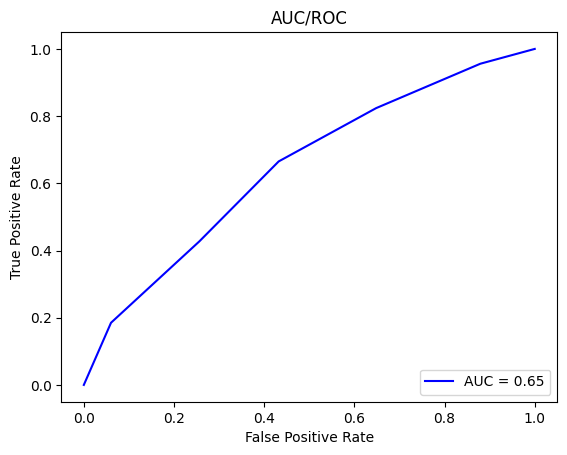

In [58]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_2=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# SVC

In [59]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train_filtered,y_train)
y_pred_test=model.predict(X_test_filtered)
y_pred_train=model.predict(X_train_filtered)

y_prediction_values_train=model.predict_proba(X_train_filtered)
y_prediction_values_test=model.predict_proba(X_test_filtered)

In [60]:
svc_acc_train=accuracy_score(y_train,y_pred_train)*100
svc_acc_test=accuracy_score(y_test,y_pred_test)*100
svc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
svc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
svc_f1_train=f1_score(y_train, y_pred_train, average='macro')
svc_f1_test=f1_score(y_test, y_pred_test, average='macro')
svc_prec_train=precision_score(y_train, y_pred_train)
svc_prec_test=precision_score(y_test, y_pred_test)
svc_recall_train=recall_score(y_train, y_pred_train)
svc_recall_test=recall_score(y_test, y_pred_test)
svc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

svc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


svc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
svc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[108  91]
 [ 77 150]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5838    0.5427    0.5625       199
           1     0.6224    0.6608    0.6410       227

    accuracy                         0.6056       426
   macro avg     0.6031    0.6018    0.6018       426
weighted avg     0.6044    0.6056    0.6043       426



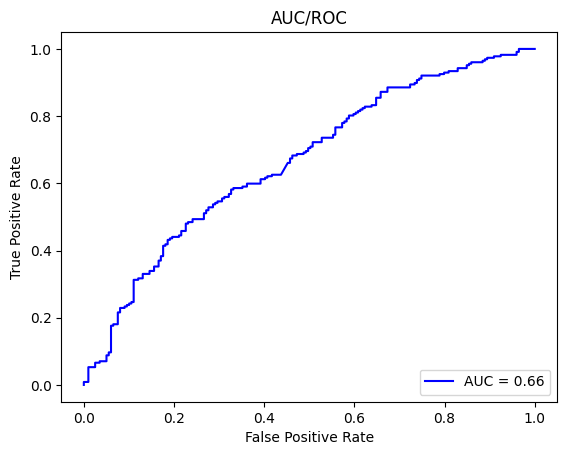

In [61]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_3=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_filtered,y_train)
y_pred_test=lr.predict(X_test_filtered)
y_pred_train=lr.predict(X_train_filtered)

y_prediction_values_train=lr.predict_proba(X_train_filtered)
y_prediction_values_test=lr.predict_proba(X_test_filtered)                                     

In [63]:
lr_acc_train=accuracy_score(y_train,y_pred_train)*100
lr_acc_test=accuracy_score(y_test,y_pred_test)*100
lr_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lr_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lr_f1_train=f1_score(y_train, y_pred_train, average='macro')
lr_f1_test=f1_score(y_test, y_pred_test, average='macro')
lr_prec_train=precision_score(y_train, y_pred_train)
lr_prec_test=precision_score(y_test, y_pred_test)
lr_recall_train=recall_score(y_train, y_pred_train)
lr_recall_test=recall_score(y_test, y_pred_test)
lr_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lr_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

lr_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lr_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[122  77]
 [ 80 147]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6040    0.6131    0.6085       199
           1     0.6562    0.6476    0.6519       227

    accuracy                         0.6315       426
   macro avg     0.6301    0.6303    0.6302       426
weighted avg     0.6318    0.6315    0.6316       426



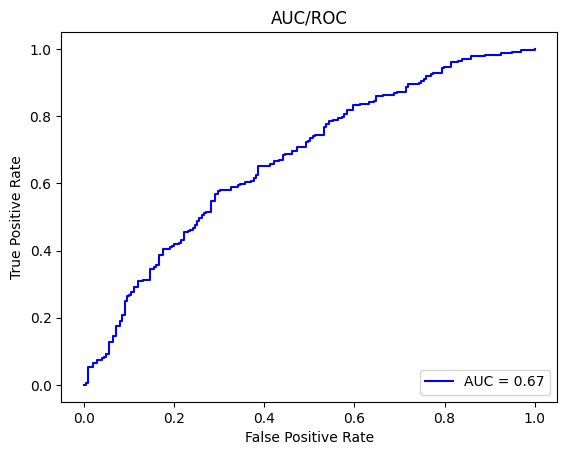

In [64]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_4=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# XGB

In [65]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
xgb.fit(X_train_filtered, y_train)
y_pred_train = xgb.predict(X_train_filtered)
y_pred_test = xgb.predict(X_test_filtered)

y_prediction_values_train=xgb.predict_proba(X_train_filtered)
y_prediction_values_test=xgb.predict_proba(X_test_filtered)

[12:49:45] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [66]:
xgb_acc_train=accuracy_score(y_train,y_pred_train)*100
xgb_acc_test=accuracy_score(y_test,y_pred_test)*100
xgb_mcc_train=matthews_corrcoef(y_train, y_pred_train)
xgb_mcc_test=matthews_corrcoef(y_test, y_pred_test)
xgb_f1_train=f1_score(y_train, y_pred_train, average='macro')
xgb_f1_test=f1_score(y_test, y_pred_test, average='macro')
xgb_prec_train=precision_score(y_train, y_pred_train)
xgb_prec_test=precision_score(y_test, y_pred_test)
xgb_recall_train=recall_score(y_train, y_pred_train)
xgb_recall_test=recall_score(y_test, y_pred_test)

xgb_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

xgb_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)



xgb_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
xgb_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[132  67]
 [ 74 153]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6408    0.6633    0.6519       199
           1     0.6955    0.6740    0.6846       227

    accuracy                         0.6690       426
   macro avg     0.6681    0.6687    0.6682       426
weighted avg     0.6699    0.6690    0.6693       426



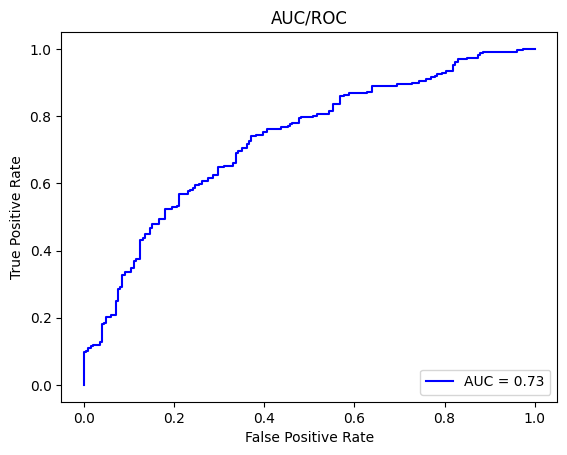

In [67]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_5=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Gaussian NB

In [68]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_filtered, y_train)

y_pred_train = clf.predict(X_train_filtered)
y_pred_test = clf.predict(X_test_filtered)
y_prediction_values_train=clf.predict_proba(X_train_filtered)
y_prediction_values_test=clf.predict_proba(X_test_filtered)

In [69]:
clf_acc_train=accuracy_score(y_train,y_pred_train)*100
clf_acc_test=accuracy_score(y_test,y_pred_test)*100
clf_mcc_train=matthews_corrcoef(y_train, y_pred_train)
clf_mcc_test=matthews_corrcoef(y_test, y_pred_test)
clf_f1_train=f1_score(y_train, y_pred_train, average='macro')
clf_f1_test=f1_score(y_test, y_pred_test, average='macro')
clf_prec_train=precision_score(y_train, y_pred_train)
clf_prec_test=precision_score(y_test, y_pred_test)
clf_recall_train=recall_score(y_train, y_pred_train)
clf_recall_test=recall_score(y_test, y_pred_test)
clf_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

clf_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

clf_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
clf_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 78 121]
 [ 58 169]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5735    0.3920    0.4657       199
           1     0.5828    0.7445    0.6538       227

    accuracy                         0.5798       426
   macro avg     0.5781    0.5682    0.5597       426
weighted avg     0.5784    0.5798    0.5659       426



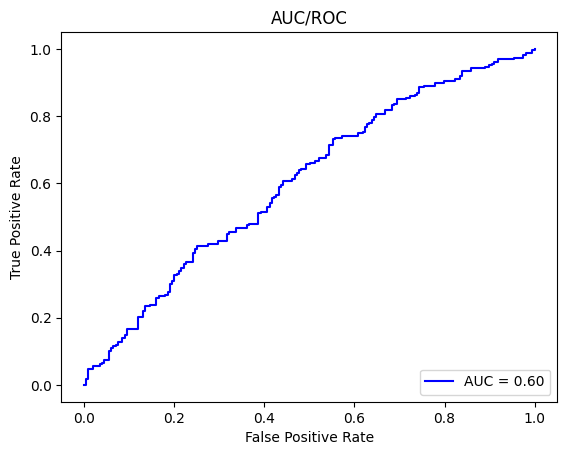

In [70]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_6=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## MLP

In [71]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_filtered, y_train)

y_pred_train = mlp.predict(X_train_filtered)
y_pred_test = mlp.predict(X_test_filtered)
y_prediction_values_train=mlp.predict_proba(X_train_filtered)
y_prediction_values_test=mlp.predict_proba(X_test_filtered)

In [72]:
mlp_acc_train=accuracy_score(y_train,y_pred_train)*100
mlp_acc_test=accuracy_score(y_test,y_pred_test)*100
mlp_mcc_train=matthews_corrcoef(y_train, y_pred_train)
mlp_mcc_test=matthews_corrcoef(y_test, y_pred_test)
mlp_f1_train=f1_score(y_train, y_pred_train, average='macro')
mlp_f1_test=f1_score(y_test, y_pred_test, average='macro')
mlp_prec_train=precision_score(y_train, y_pred_train)
mlp_prec_test=precision_score(y_test, y_pred_test)
mlp_recall_train=recall_score(y_train, y_pred_train)
mlp_recall_test=recall_score(y_test, y_pred_test)

mlp_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

mlp_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


mlp_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
mlp_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[125  74]
 [ 95 132]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5682    0.6281    0.5967       199
           1     0.6408    0.5815    0.6097       227

    accuracy                         0.6033       426
   macro avg     0.6045    0.6048    0.6032       426
weighted avg     0.6069    0.6033    0.6036       426



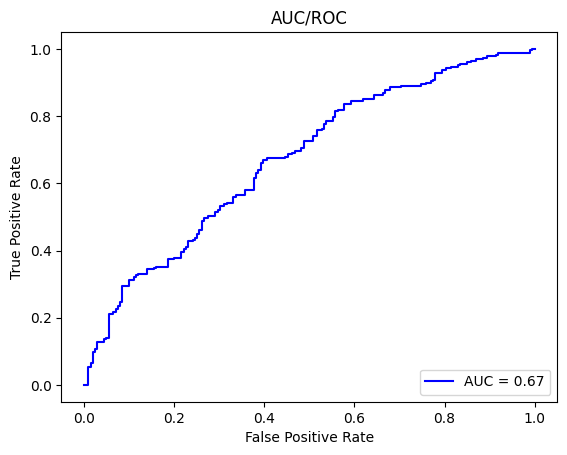

In [73]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_7=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Extratree classifier

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
etc.fit(X_train_filtered, y_train)


y_pred_train = etc.predict(X_train_filtered)
y_pred_test = etc.predict(X_test_filtered)
y_prediction_values_train=etc.predict_proba(X_train_filtered)
y_prediction_values_test=etc.predict_proba(X_test_filtered)

In [75]:
etc_acc_train=accuracy_score(y_train,y_pred_train)*100
etc_acc_test=accuracy_score(y_test,y_pred_test)*100
etc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
etc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
etc_f1_train=f1_score(y_train, y_pred_train, average='macro')
etc_f1_test=f1_score(y_test, y_pred_test, average='macro')
etc_prec_train=precision_score(y_train, y_pred_train)
etc_prec_test=precision_score(y_test, y_pred_test)
etc_recall_train=recall_score(y_train, y_pred_train)
etc_recall_test=recall_score(y_test, y_pred_test)

etc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

etc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

etc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
etc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[129  70]
 [ 80 147]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6172    0.6482    0.6324       199
           1     0.6774    0.6476    0.6622       227

    accuracy                         0.6479       426
   macro avg     0.6473    0.6479    0.6473       426
weighted avg     0.6493    0.6479    0.6482       426



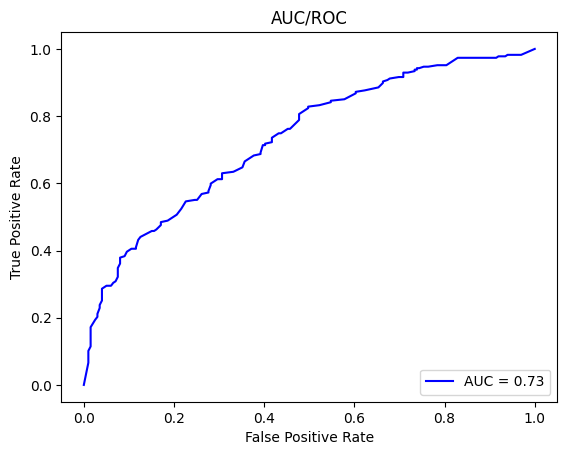

In [76]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_8=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Decision Tree classifier

In [77]:
## Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dtc.fit(X_train_filtered, y_train)


y_pred_train = dtc.predict(X_train_filtered)
y_pred_test = dtc.predict(X_test_filtered)

y_prediction_values_train=dtc.predict_proba(X_train_filtered)
y_prediction_values_test=dtc.predict_proba(X_test_filtered)                           

In [78]:
dtc_acc_train=accuracy_score(y_train,y_pred_train)*100
dtc_acc_test=accuracy_score(y_test,y_pred_test)*100
dtc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
dtc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
dtc_f1_train=f1_score(y_train, y_pred_train, average='macro')
dtc_f1_test=f1_score(y_test, y_pred_test, average='macro')
dtc_prec_train=precision_score(y_train, y_pred_train)
dtc_prec_test=precision_score(y_test, y_pred_test)
dtc_recall_train=recall_score(y_train, y_pred_train)
dtc_recall_test=recall_score(y_test, y_pred_test)

dtc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

dtc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

dtc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
dtc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[110  89]
 [ 88 139]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5556    0.5528    0.5542       199
           1     0.6096    0.6123    0.6110       227

    accuracy                         0.5845       426
   macro avg     0.5826    0.5825    0.5826       426
weighted avg     0.5844    0.5845    0.5844       426



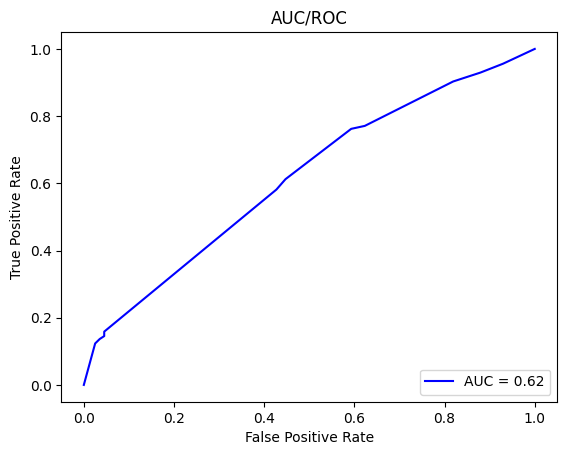

In [79]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_9=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## LDA

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_filtered, y_train)


y_pred_train =lda.predict(X_train_filtered)
y_pred_test = lda.predict(X_test_filtered)

y_prediction_values_train=lda.predict_proba(X_train_filtered)
y_prediction_values_test=lda.predict_proba(X_test_filtered)
                                                        

In [81]:
lda_acc_train=accuracy_score(y_train,y_pred_train)*100
lda_acc_test=accuracy_score(y_test,y_pred_test)*100
lda_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lda_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lda_f1_train=f1_score(y_train, y_pred_train, average='macro')
lda_f1_test=f1_score(y_test, y_pred_test, average='macro')
lda_prec_train=precision_score(y_train, y_pred_train)
lda_prec_test=precision_score(y_test, y_pred_test)
lda_recall_train=recall_score(y_train, y_pred_train)
lda_recall_test=recall_score(y_test, y_pred_test)

lda_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lda_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


lda_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lda_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[122  77]
 [ 93 134]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5674    0.6131    0.5894       199
           1     0.6351    0.5903    0.6119       227

    accuracy                         0.6009       426
   macro avg     0.6013    0.6017    0.6006       426
weighted avg     0.6035    0.6009    0.6014       426



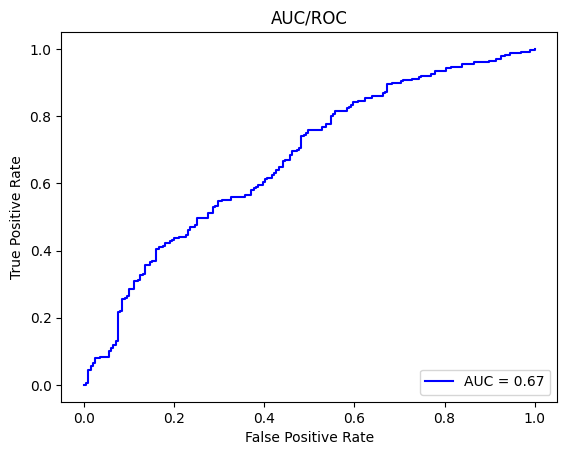

In [82]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_10=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

In [83]:
data_train = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
         'Accuracy_train':[rfc_acc_train,knn_acc_train,svc_acc_train,lr_acc_train,xgb_acc_train,clf_acc_train,mlp_acc_train,etc_acc_train,dtc_acc_train,lda_acc_train],
       'MCC Score_train':[rfc_mcc_train,knn_mcc_train,svc_mcc_train,lr_mcc_train,xgb_mcc_train,clf_mcc_train,mlp_mcc_train,etc_mcc_train,dtc_mcc_train,lda_mcc_train],
       'F1 Score_train':[rfc_f1_train,knn_f1_train,svc_f1_train,lr_f1_train,xgb_f1_train,clf_f1_train,mlp_f1_train,etc_f1_train,dtc_f1_train,lda_f1_train],
       'Precision_train':[rfc_prec_train,knn_prec_train,svc_prec_train,lr_prec_train,xgb_prec_train,clf_prec_train,mlp_prec_train,etc_prec_train,dtc_prec_train,lda_prec_train],
       'Recall_train':[rfc_recall_train,knn_recall_train,svc_recall_train,lr_recall_train,xgb_recall_train,clf_recall_train,mlp_recall_train,etc_recall_train,dtc_recall_train,lda_recall_train],
         'kappa Score_train':[rfc_kappa_train,knn_kappa_train,svc_kappa_train,lr_kappa_train,xgb_kappa_train,clf_kappa_train,mlp_kappa_train,etc_kappa_train,dtc_kappa_train,lda_kappa_train],
       'AUC/ROC_train':[rfc_auc_train,knn_auc_train,svc_auc_train,lr_auc_train,xgb_auc_train,clf_auc_train,mlp_auc_train,etc_auc_train,dtc_auc_train,lda_auc_train]}
df_train = pd.DataFrame(data_train)

In [84]:
data_test = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
             'Accuracy_test': [rfc_acc_test,knn_acc_test,svc_acc_test,lr_acc_test,xgb_acc_test,clf_acc_test,mlp_acc_test,etc_acc_test,dtc_acc_test,lda_acc_test],
             'MCC Score_test':[rfc_mcc_test,knn_mcc_test,svc_mcc_test,lr_mcc_test,xgb_mcc_test,clf_mcc_test,mlp_mcc_test,etc_mcc_test,dtc_mcc_test,lda_mcc_test],
              'F1 Score_test':[rfc_f1_test,knn_f1_test,svc_f1_test,lr_f1_test,xgb_f1_test,clf_f1_test,mlp_f1_test,etc_f1_test,dtc_f1_test,lda_f1_test],
               'Precision_test':[rfc_prec_test,knn_prec_test,svc_prec_test,lr_prec_test,xgb_prec_test,clf_prec_test,mlp_prec_test,etc_prec_test,dtc_prec_test,lda_prec_test],
             'Recall_test':[rfc_recall_test,knn_recall_test,svc_recall_test,lr_recall_test,xgb_recall_test,clf_recall_test,mlp_recall_test,etc_recall_test,dtc_recall_test,lda_recall_test],
              'kappa Score_test':[rfc_kappa_test,knn_kappa_test,svc_kappa_test,lr_kappa_test,xgb_kappa_test,clf_kappa_test,mlp_kappa_test,etc_kappa_test,dtc_kappa_test,lda_kappa_test],
               'AUC/ROC_test':[rfc_auc_test,knn_auc_test,svc_auc_test,lr_auc_test,xgb_auc_test,clf_auc_test,mlp_auc_test,etc_auc_test,dtc_auc_test,lda_auc_test]}
             
df_test = pd.DataFrame(data_test)             

In [85]:
df_train

,Model,Accuracy_train,MCC Score_train,F1 Score_train,Precision_train,Recall_train,kappa Score_train,AUC/ROC_train
0,RFC,76.159718,0.524955,0.761593,0.787546,0.735462,0.523739,0.860978
1,KNN,77.334116,0.546214,0.772720,0.768306,0.801596,0.545668,0.861395
2,SVC,65.766295,0.315010,0.654135,0.647295,0.736602,0.311780,0.730220
3,LR,64.415737,0.286894,0.642747,0.645230,0.686431,0.286269,0.707682
4,XGB,97.122725,0.942421,0.971194,0.968326,0.976055,0.942389,0.996508
5,GNB,61.127422,0.228886,0.593615,0.591025,0.795895,0.213433,0.674680
6,MLP,68.819730,0.375903,0.687949,0.697941,0.695553,0.375901,0.748905
7,ETC,99.765120,0.995298,0.997649,0.997719,0.997719,0.995298,0.999986
8,DTC,67.469172,0.348254,0.673589,0.674595,0.711517,0.347697,0.735906
9,LDA,65.179096,0.302421,0.651021,0.656733,0.678449,0.302244,0.712036


In [86]:
df_test

,Model,Accuracy_test,MCC Score_test,F1 Score_test,Precision_test,Recall_test,kappa Score_test,AUC/ROC_test
0,RFC,64.319249,0.291179,0.643185,0.686567,0.607930,0.289018,0.699621
1,KNN,61.971831,0.234024,0.616668,0.637131,0.665198,0.233762,0.646171
2,SVC,60.563380,0.204844,0.601763,0.622407,0.660793,0.204393,0.664711
3,LR,63.145540,0.260426,0.630182,0.656250,0.647577,0.260400,0.672349
4,XGB,66.901408,0.336778,0.668208,0.695455,0.674009,0.336595,0.728577
5,GNB,57.981221,0.146034,0.559722,0.582759,0.744493,0.139170,0.604565
6,MLP,60.328638,0.209298,0.603179,0.640777,0.581498,0.208283,0.671596
7,ETC,64.788732,0.295231,0.647258,0.677419,0.647577,0.294904,0.732263
8,DTC,58.450704,0.165152,0.582573,0.609649,0.612335,0.165150,0.616319
9,LDA,60.093897,0.202943,0.600622,0.635071,0.590308,0.202370,0.671153
